<a href="https://colab.research.google.com/github/ayushsahu1999/100-days-of-ml/blob/master/CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
cifar_dataset = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar_dataset.load_data()

It consists of 32*32 colored images (num_samples, 32, 32, 3)
It have 50,000 training and 10,000 test images.

In [2]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.softmax)
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               590080    
_________________________________________________________________
dense_3 (Dense)              (None, 100)              

In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.995):
      print ("\nAccuracy is now above 99.5% so stopping training!")
      self.model.stop_training = True

callbacks = myCallback()

In [8]:
history = model.fit(x_train, y_train, epochs=25, callbacks=[callbacks], validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 4s 3ms/step - loss: 3.7107 - accuracy: 0.1382 - val_loss: 3.2308 - val_accuracy: 0.2190
Epoch 2/25
1250/1250 [==============================] - 4s 3ms/step - loss: 2.9829 - accuracy: 0.2693 - val_loss: 2.9344 - val_accuracy: 0.2796
Epoch 3/25
1250/1250 [==============================] - 4s 3ms/step - loss: 2.6550 - accuracy: 0.3352 - val_loss: 2.7983 - val_accuracy: 0.3181
Epoch 4/25
1250/1250 [==============================] - 4s 3ms/step - loss: 2.4240 - accuracy: 0.3814 - val_loss: 2.7169 - val_accuracy: 0.3346
Epoch 5/25
1250/1250 [==============================] - 4s 3ms/step - loss: 2.2250 - accuracy: 0.4260 - val_loss: 2.7465 - val_accuracy: 0.3350
Epoch 6/25
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0620 - accuracy: 0.4567 - val_loss: 2.7304 - val_accuracy: 0.3456
Epoch 7/25
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9072 - accuracy: 0.4923 - val_loss: 2.8044 - val_accuracy:

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.7050 - accuracy: 0.3030


[6.705004692077637, 0.30300000309944153]

Text(0, 0.5, 'Loss')

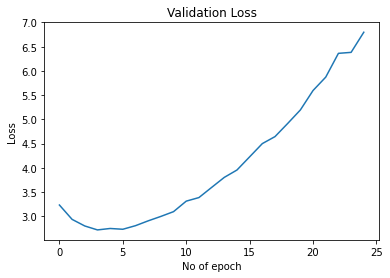

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('No of epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

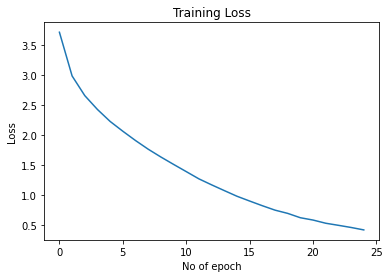

In [11]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('No of epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

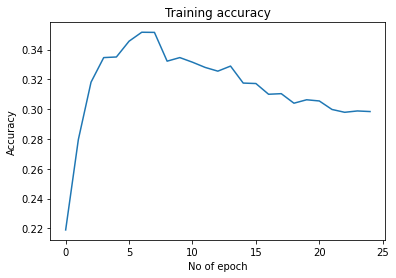

In [12]:
plt.plot(history.history['val_accuracy'])
plt.title('Training accuracy')
plt.xlabel('No of epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

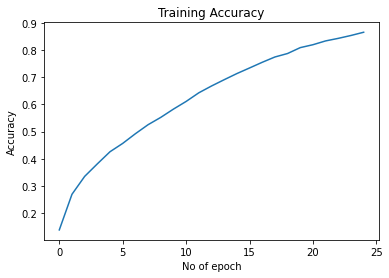

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('No of epoch')
plt.ylabel('Accuracy')

59


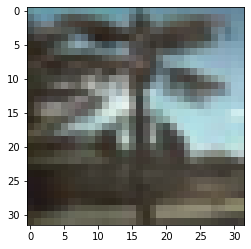

In [ ]:
import numpy as np
image = 5000
answer = np.argmax(model.predict(x_test[image].reshape(1, 32, 32, 3)), axis=-1)
print (answer.squeeze())

plt.imshow(x_test[image].reshape(32, 32, 3))

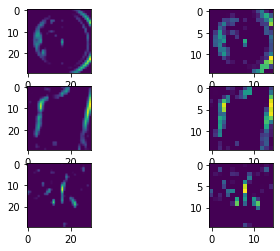

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 2)
FIRST_IMAGE = 45
SECOND_IMAGE = 10
THIRD_IMAGE = 5000
CONVOLUTION_NUMBER = 10

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0, 2):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 32, 32, 3))[x]
  axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER])
  axarr[0, x].grid = False
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 32, 32, 3))[x]
  axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER])
  axarr[1, x].grid = False
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 32, 32, 3))[x]
  axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER])
  axarr[2, x].grid = False

In [ ]:
# As you can see, our CIFAR-100 image classifier performs worse than the CIFAR-10 one. 
# This is not strange: the CIFAR-100 one has ten times as many classes that it can choose from.

# Neither is it strange that we observe overfitting again, by looking at the plot that displays validation loss.
# Our best model, with an accuracy of just above 35%, is achieved around epoch number 20. After then, performance deteriorates.